In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Optional (for interactive charts later)
import plotly.express as px

In [2]:
# Choose stock ticker
ticker = "GOOG"   # you can change this

# Download stock data (last 10 years)
df = yf.download(ticker, start="2015-01-01", end="2024-12-31")

df.head()


C:\Users\Muntaha\AppData\Local\Temp\ipykernel_5688\3820296224.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-01-02,25.990789,26.310717,25.955628,26.198791,28951268
2015-01-05,25.448997,25.967021,25.408884,25.914029,41196796
2015-01-06,24.859167,25.563155,24.814102,25.504963,57998800
2015-01-07,24.816576,25.120852,24.744766,25.108768,41301082
2015-01-08,24.894821,24.934440,24.316378,24.662553,67071641


In [3]:
df.shape

(2515, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2515 non-null   float64
 1   (High, GOOG)    2515 non-null   float64
 2   (Low, GOOG)     2515 non-null   float64
 3   (Open, GOOG)    2515 non-null   float64
 4   (Volume, GOOG)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,82.206638,83.038369,81.344216,82.154852,3.078201e+07
std,44.247027,44.726436,43.777894,44.225013,1.536687e+07
min,24.393143,24.562813,24.146016,24.497143,6.809800e+06
25%,46.157383,46.397741,45.862773,46.170542,2.122600e+07
50%,64.162422,64.523943,63.515355,64.034792,2.702400e+07
75%,120.127937,121.384339,119.258881,120.142836,3.569100e+07
max,197.520340,202.225105,196.055084,197.889141,2.232980e+08


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-12-23,195.357346,195.855732,191.011419,193.403666,15235900
2024-12-24,196.932220,197.031889,194.567868,195.536731,6809800
2024-12-26,196.463745,197.520321,195.237705,196.104907,7907900
2024-12-27,193.413620,196.164720,191.352302,195.835784,14693000
2024-12-30,192.067993,193.154471,189.745513,190.248887,12209500


EDA

In [7]:
df.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

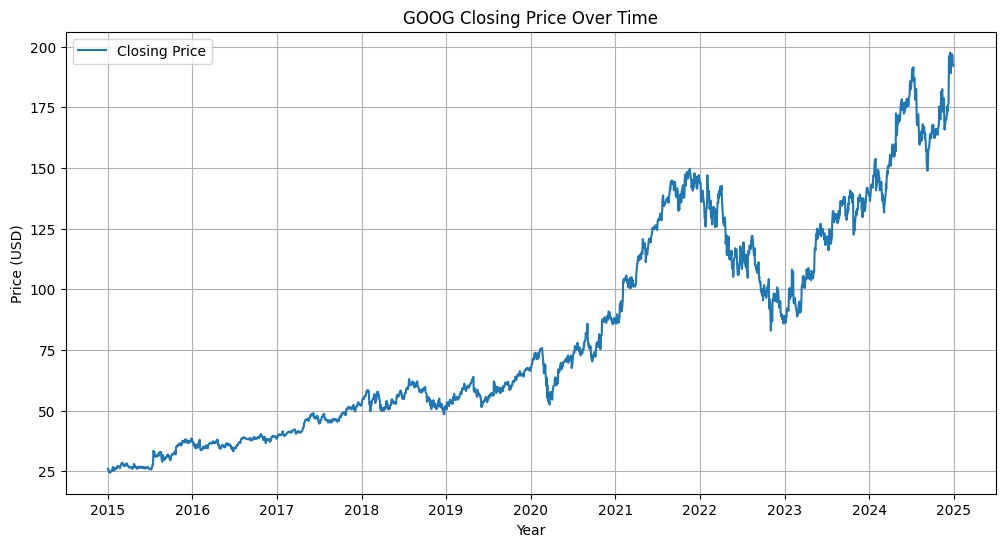

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('GOOG Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

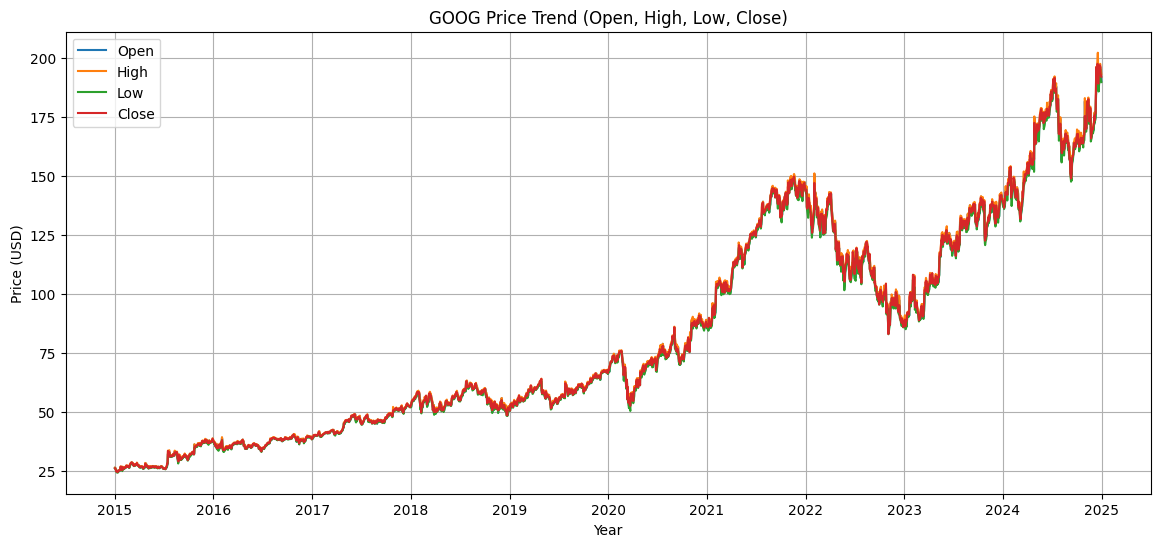

In [10]:
plt.figure(figsize=(14,6))
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')

plt.title('GOOG Price Trend (Open, High, Low, Close)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

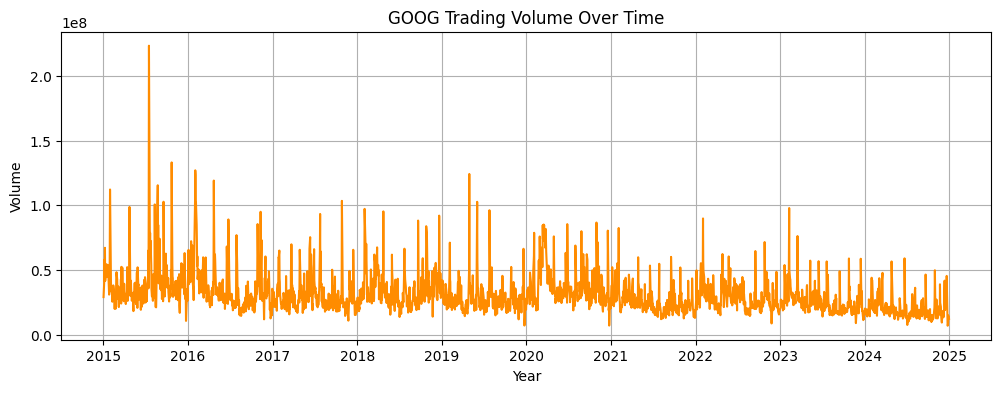

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df['Volume'], label='Volume', color='darkorange')
plt.title('GOOG Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

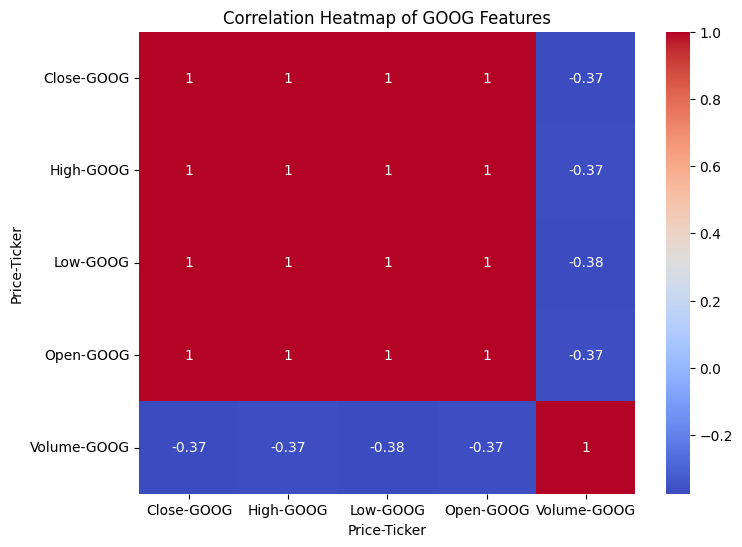

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of GOOG Features')
plt.show()

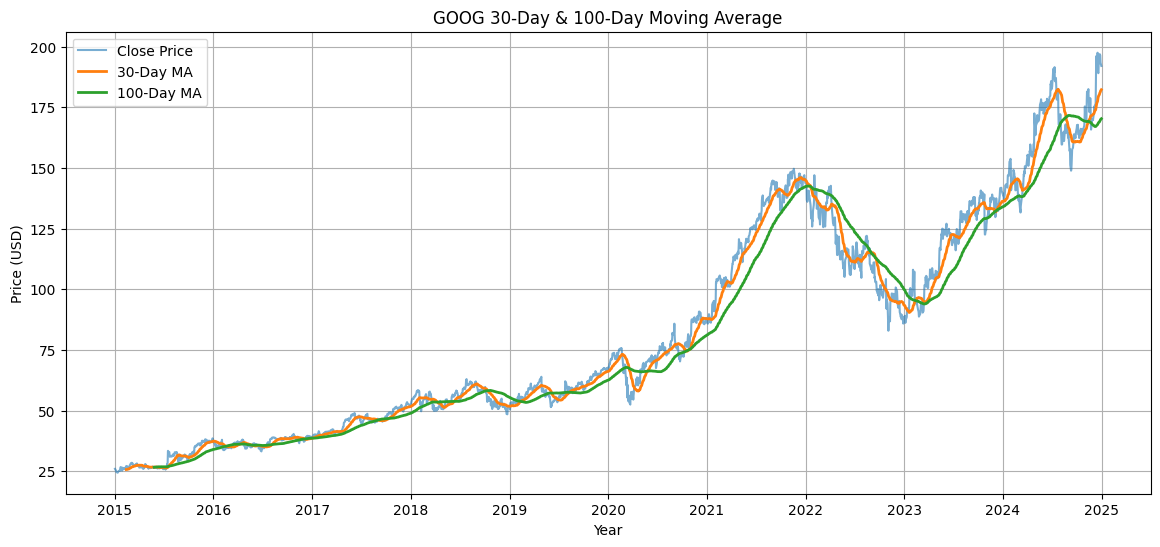

In [13]:
df['MA_30'] = df['Close'].rolling(30).mean()
df['MA_100'] = df['Close'].rolling(100).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['MA_30'], label='30-Day MA', linewidth=2)
plt.plot(df['MA_100'], label='100-Day MA', linewidth=2)

plt.title('GOOG 30-Day & 100-Day Moving Average')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

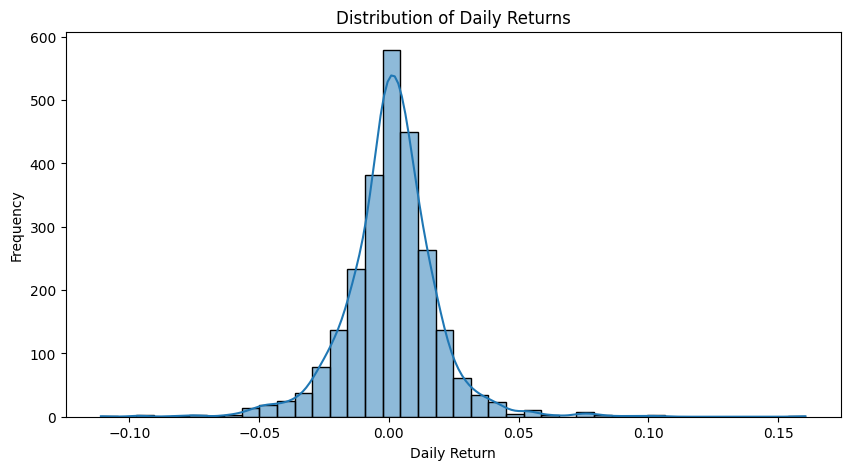

In [14]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'].dropna(), bins=40, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Advanced EDA

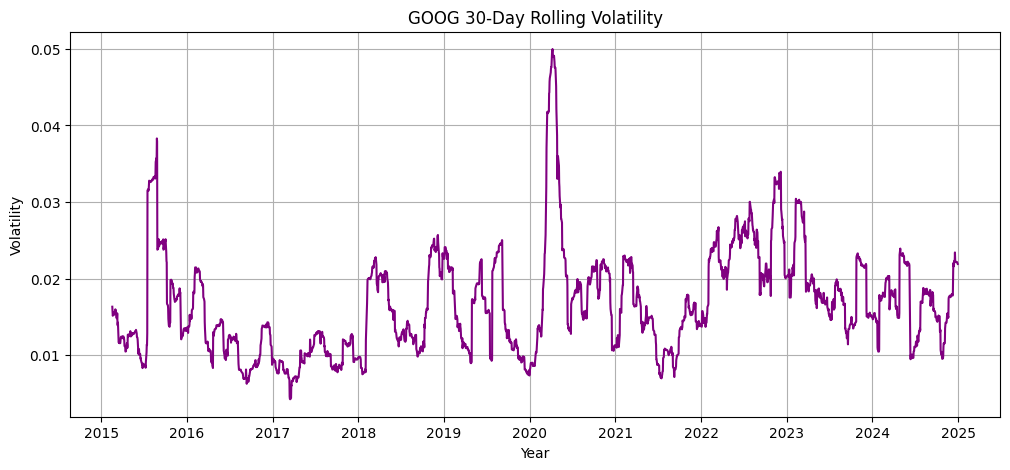

In [15]:
# Rolling Volatility (30-day)
df['Volatility_30'] = df['Daily_Return'].rolling(30).std()

plt.figure(figsize=(12,5))
plt.plot(df['Volatility_30'], color='purple')
plt.title('GOOG 30-Day Rolling Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


<Figure size 1200x400 with 0 Axes>

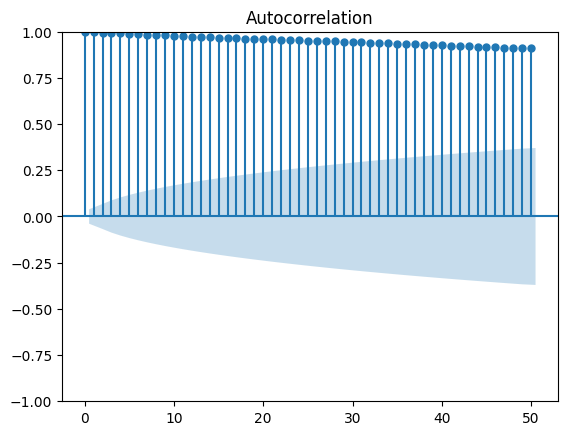

<Figure size 1200x400 with 0 Axes>

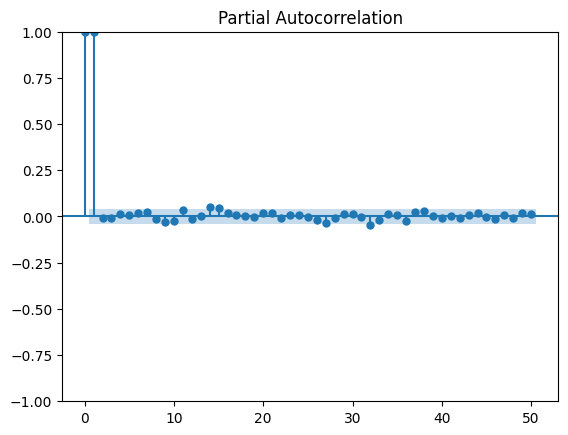

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(df['Close'].dropna(), lags=50)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df['Close'].dropna(), lags=50)
plt.show()

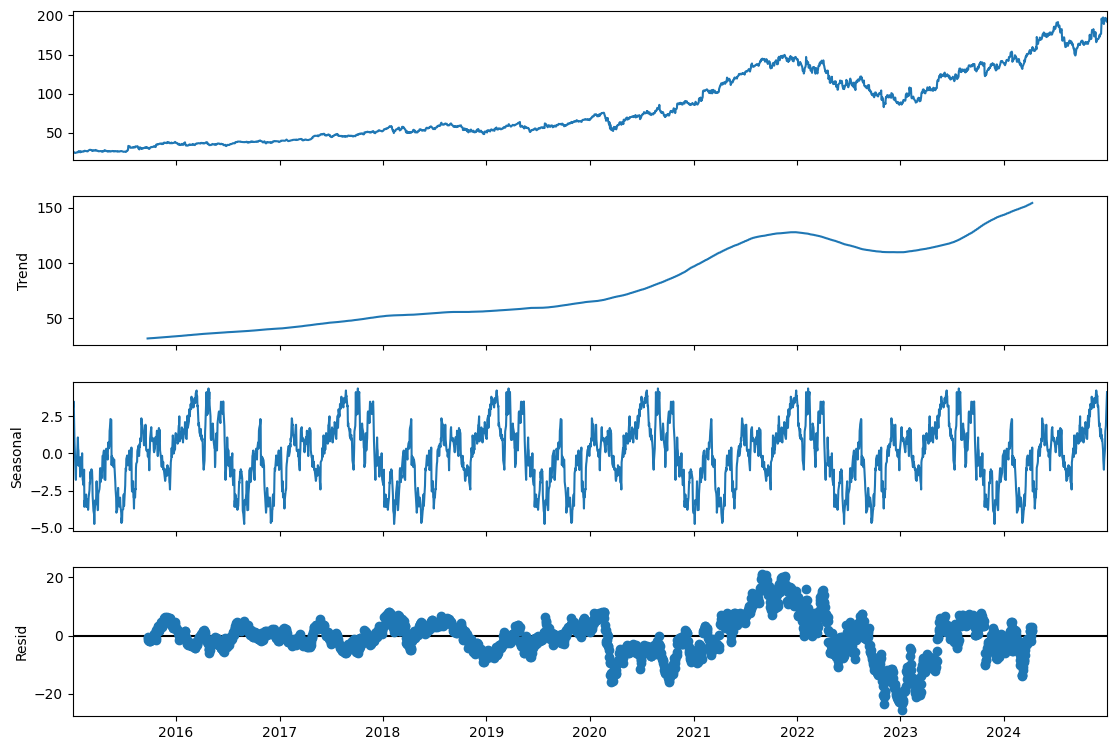

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

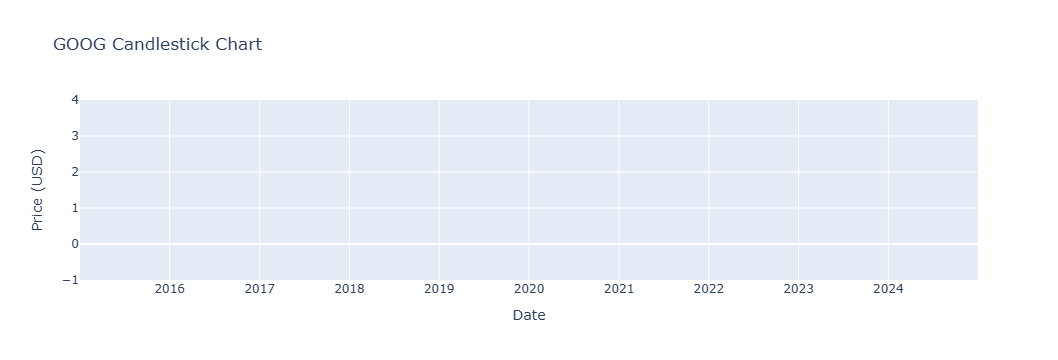

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.update_layout(
    title='GOOG Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)

fig.show()

C:\Users\Muntaha\AppData\Local\Temp\ipykernel_5688\3982452039.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



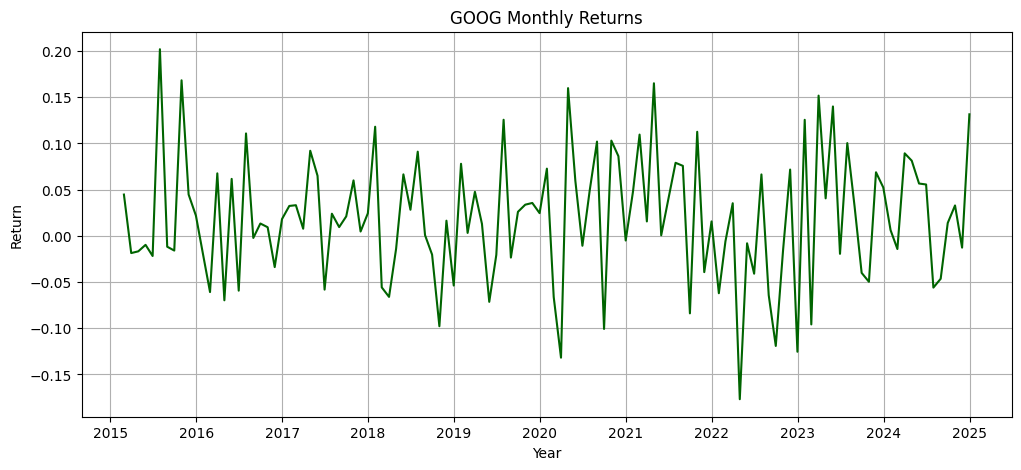

In [19]:
monthly_returns = df['Close'].resample('M').ffill().pct_change()

plt.figure(figsize=(12,5))
plt.plot(monthly_returns, color='darkgreen')
plt.title('GOOG Monthly Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.grid(True)
plt.show()


C:\Users\Muntaha\AppData\Local\Temp\ipykernel_5688\2991519660.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



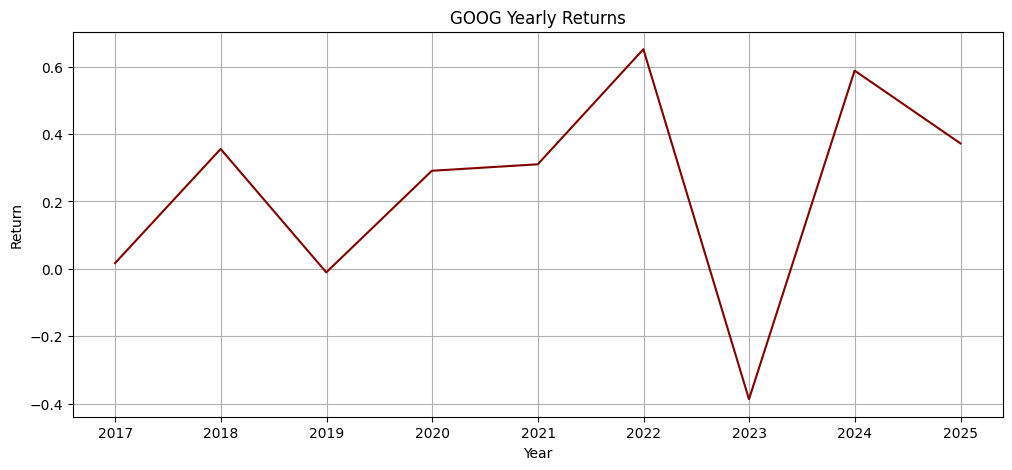

In [20]:
yearly_returns = df['Close'].resample('Y').ffill().pct_change()

plt.figure(figsize=(12,5))
plt.plot(yearly_returns, color='maroon')
plt.title('GOOG Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.grid(True)
plt.show()


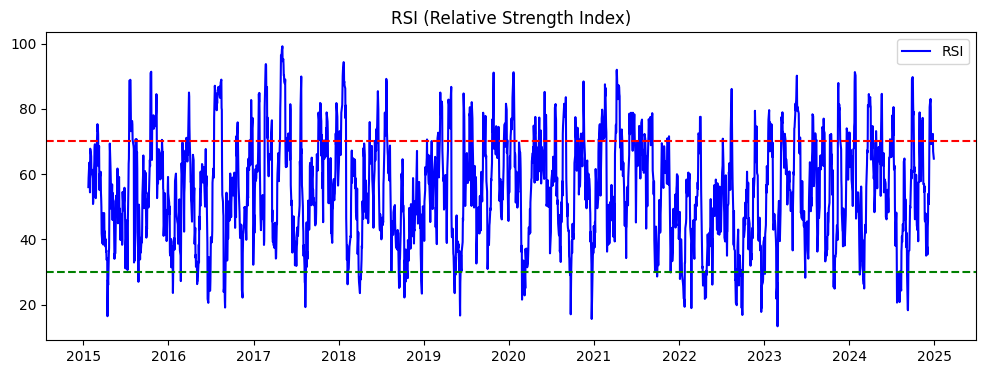

In [21]:
window_length = 14

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window_length).mean()

RS = gain / loss
df['RSI'] = 100 - (100 / (1 + RS))

plt.figure(figsize=(12,4))
plt.plot(df['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI (Relative Strength Index)')
plt.legend()
plt.show()


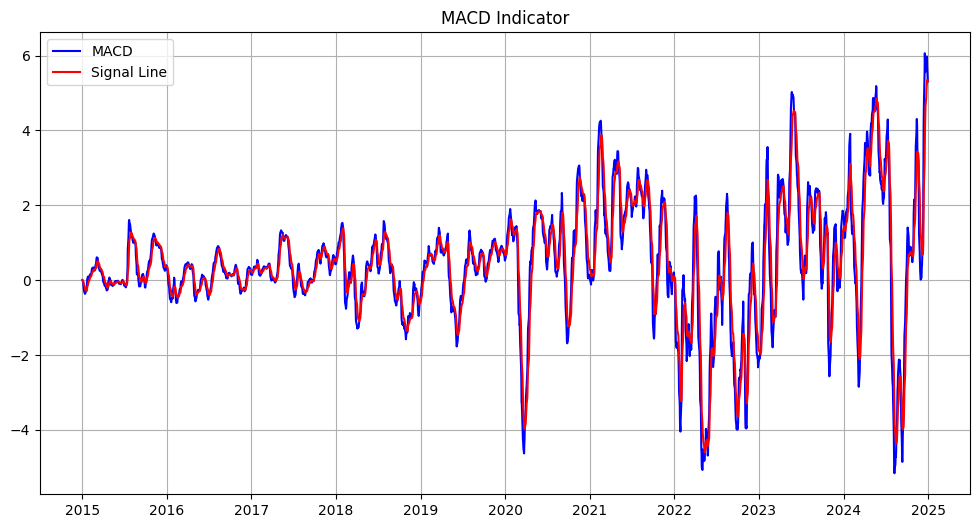

In [22]:
# MACD calculation
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal'], label='Signal Line', color='red')
plt.legend()
plt.title('MACD Indicator')
plt.grid(True)
plt.show()

DATA PREPROCESSING

In [23]:
df = df.ffill().bfill()

In [24]:
df = df.copy() 

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
df.head()

Price,Close,High,Low,Open,Volume,MA_30,MA_100,Daily_Return,Volatility_30,RSI,EMA12,EMA26,MACD,Signal
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,,,,,,,
Date,,,,,,,,,,,,,,
2015-01-02,25.990789,26.310717,25.955628,26.198791,28951268,25.71973,26.643915,-0.020846,0.016313,56.016098,25.990789,25.990789,0.000000,0.000000
2015-01-05,25.448997,25.967021,25.408884,25.914029,41196796,25.71973,26.643915,-0.020846,0.016313,56.016098,25.907437,25.950657,-0.043220,-0.008644
2015-01-06,24.859167,25.563155,24.814102,25.504963,57998800,25.71973,26.643915,-0.023177,0.016313,56.016098,25.746165,25.869806,-0.123641,-0.031643
2015-01-07,24.816576,25.120852,24.744766,25.108768,41301082,25.71973,26.643915,-0.001713,0.016313,56.016098,25.603151,25.791789,-0.188638,-0.063042
2015-01-08,24.894821,24.934440,24.316378,24.662553,67071641,25.71973,26.643915,0.003153,0.016313,56.016098,25.494177,25.725347,-0.231169,-0.096668


Feature Engineering

In [27]:
df = df[['Open','High','Low','Close','Volume']]

In [28]:
# EMA
df['EMA_10']  = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()

# Bollinger Bands (fixed)
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std  = df['Close'].rolling(window=20).std()

df['BB_MID']   = rolling_mean
df['BB_UPPER'] = rolling_mean + (rolling_std * 2)
df['BB_LOWER'] = rolling_mean - (rolling_std * 2)

# RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# MACD
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [29]:
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

In [30]:
df = df.dropna()
df.head(2)

Price,Open,High,Low,Close,Volume,EMA_10,EMA_20,BB_MID,BB_UPPER,BB_LOWER,RSI,MACD,MACD_Signal,Lag_1,Lag_7,MA_7,MA_30
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2015-02-13,26.908973,27.233851,26.898077,27.189280,38006060,26.487325,26.186931,26.119357,27.315507,24.923208,57.074063,0.318225,0.196958,26.888168,25.889269,26.539733,25.719730
2015-02-17,27.081316,27.238308,26.797047,26.883715,32336537,26.559396,26.253291,26.205430,27.358568,25.052293,63.893059,0.332583,0.224083,27.189280,26.127974,26.647696,25.749494


In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

Price,Open,High,Low,Close,Volume,EMA_10,EMA_20,BB_MID,BB_UPPER,BB_LOWER,RSI,MACD,MACD_Signal,Lag_1,Lag_7,MA_7,MA_30
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,,,,,,,,,,
0,0.006453,0.007232,0.007709,0.008865,0.144101,0.002785,0.000000,0.000000,0.001942,0.016951,0.509370,0.488317,0.482696,0.007112,0.001300,0.003794,0.000000
1,0.007455,0.007258,0.007116,0.007087,0.117913,0.003218,0.000409,0.000533,0.002182,0.017781,0.588858,0.489597,0.485421,0.008865,0.002689,0.004437,0.000190
2,0.005892,0.005990,0.006076,0.006182,0.102785,0.003402,0.000687,0.001036,0.002064,0.018963,0.638943,0.489156,0.487501,0.007087,0.003675,0.004803,0.000462
3,0.004925,0.005322,0.006222,0.007095,0.059922,0.003724,0.001032,0.001417,0.002341,0.019433,0.650004,0.489594,0.489265,0.006182,0.002761,0.005437,0.000893
4,0.006390,0.005502,0.005579,0.005966,0.101979,0.003776,0.001229,0.001487,0.002460,0.019440,0.467119,0.488219,0.490365,0.007095,0.005386,0.005521,0.001292


In [32]:
training_data_len = int(len(scaled_df) * 0.8)

train_data = scaled_df.iloc[:training_data_len]
test_data = scaled_df.iloc[training_data_len - 60:]  # keep lookback overlap

In [33]:
def create_sequences_multivariate(data, target_col='Close', lookback=60):

    X, y = [], []
    target_index = data.columns.get_loc(target_col)

    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].values)
        y.append(data.iloc[i, target_index])

    return np.array(X), np.array(y)

In [34]:
lookback = 60

X_train, y_train = create_sequences_multivariate(train_data)
X_test, y_test = create_sequences_multivariate(test_data)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1928, 60, 17), (1928, 1), (498, 60, 17), (498, 1))

In [35]:
print("X_train shape :", X_train.shape)
print("X_test shape  :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape  :", y_test.shape)

X_train shape : (1928, 60, 17)
X_test shape  : (498, 60, 17)
y_train shape : (1928, 1)
y_test shape  : (498, 1)


Bidirectional LSTM Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), 
                  input_shape=(X_train.shape[1], X_train.shape[2])),
    
    Bidirectional(LSTM(64, return_sequences=False)),
    
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\Muntaha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 128)             │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,961 (566.25 KB)

 Trainable params: 144,961 (566.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - loss: 0.0044 - val_loss: 0.0052
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.6258e-04 - val_loss: 0.0058
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 1.9236e-04 - val_loss: 0.0041
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.0400e-04 - val_loss: 0.0040
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.9804e-04 - val_loss: 0.0027
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 1.6111e-04 - val_loss: 0.0015
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 1.5948e-04 - val_loss: 0.0030
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.6386e-04 - val_loss: 0.0032
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.1997e-04 - val_loss: 7.8206e-04
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 1.8863e-04 - val_loss: 0.0022
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 1.4137e-04 - val_loss: 0.0026
Epoch 12/50
5

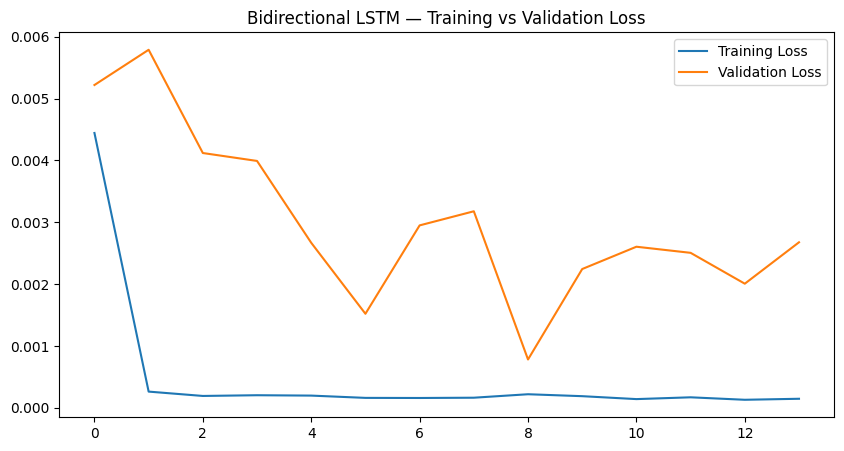

In [39]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM — Training vs Validation Loss')
plt.legend()
plt.show()


In [40]:
predictions = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step


checking indexes before perfoming Reverse Scaling

In [41]:
predictions.shape

(498, 1)

In [42]:
y_test.shape

(498, 1)

In [43]:
df.columns, len(df.columns)

(MultiIndex([(       'Open', 'GOOG'),
             (       'High', 'GOOG'),
             (        'Low', 'GOOG'),
             (      'Close', 'GOOG'),
             (     'Volume', 'GOOG'),
             (     'EMA_10',     ''),
             (     'EMA_20',     ''),
             (     'BB_MID',     ''),
             (   'BB_UPPER',     ''),
             (   'BB_LOWER',     ''),
             (        'RSI',     ''),
             (       'MACD',     ''),
             ('MACD_Signal',     ''),
             (      'Lag_1',     ''),
             (      'Lag_7',     ''),
             (       'MA_7',     ''),
             (      'MA_30',     '')],
            names=['Price', 'Ticker']),
 17)

In [44]:
close_index = df.columns.get_loc('Close')
close_index


array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [45]:
pred_flat = predictions.ravel()
ytest_flat = y_test.ravel()
pred_flat.shape, ytest_flat.shape

((498,), (498,))

In [46]:
test_rows = predictions.shape[0]
features = df.shape[1]

full_pred = np.zeros((test_rows, features))
full_pred.shape, full_pred[:, close_index].shape


((498, 17), (498, 1))

In [47]:
# correct close index for MultiIndex columns
close_index = df.columns.get_loc(('Close', 'GOOG'))

# ----- Reverse scale predictions -----
full_pred = np.zeros((predictions.shape[0], df.shape[1]))
full_pred[:, close_index] = predictions.ravel()

inv_pred = scaler.inverse_transform(full_pred)[:, close_index]

# ----- Reverse scale true values -----
dummy_true = np.zeros((y_test.shape[0], df.shape[1]))
dummy_true[:, close_index] = y_test.ravel()

inv_y_test = scaler.inverse_transform(dummy_true)[:, close_index]


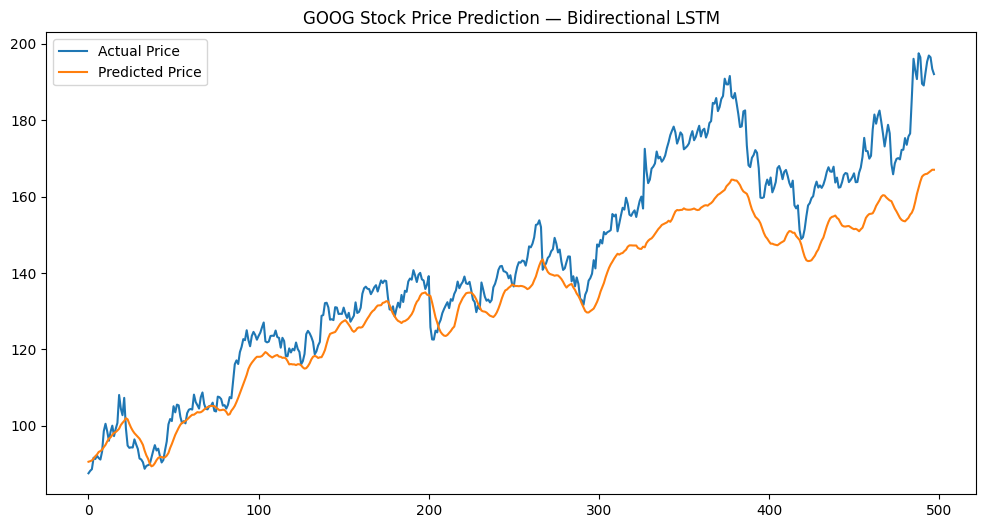

In [48]:
plt.figure(figsize=(12,6))
plt.plot(inv_y_test, label='Actual Price')
plt.plot(inv_pred, label='Predicted Price')
plt.title("GOOG Stock Price Prediction — Bidirectional LSTM")
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(inv_y_test, inv_pred))
rmse

12.17199981427335

Future Prediction

In [50]:
seq_length = 60

In [51]:
# Get the last sequence from the scaled data
last_sequence = scaled_data[-60:]      # last 60 rows
last_sequence = last_sequence.reshape(1, 60, -1)   # -1 means auto-detect features

last_sequence.shape

(1, 60, 17)

In [66]:
# # Extract scaler values for Close column
# close_min = scaler.data_min_[0]
# close_range = scaler.data_range_[0]

# # Manual inverse transform
# next_day_price = next_day_scaled[0][0] * close_range + close_min

# print("📌 Predicted Next Day Closing Price:", next_day_price)............................# 1 — Predict next day (scaled)
last_sequence = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])
next_day_scaled = model.predict(last_sequence)

# 2 — Extract scaler values
close_min = scaler.min_[0]
close_range = scaler.data_range_[0]

# 3 — Manual inverse transform (because we only predicted 1 feature)
next_day_price = next_day_scaled[0][0] * close_range + close_min

# 4 — Show result
print("📌 Predicted Next Day Closing Price:", next_day_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
📌 Predicted Next Day Closing Price: 141.40100358038515


In [67]:
future_steps = 30
future_predictions = []

current_sequence = last_sequence.copy()  # (1, 60, features)
num_features = current_sequence.shape[2]

for _ in range(future_steps):

    # 1. Predict next day close
    pred_scaled = model.predict(current_sequence)[0][0]   # scalar
    
    # 2. Build next day's full feature row
    last_row = current_sequence[0, -1, :].copy()           # (features,)
    next_row = last_row.copy()
    
    # update ONLY the CLOSE price (feature index 0)
    next_row[0] = pred_scaled
    
    # 3. Append this new row to the sequence
    next_row = next_row.reshape(1, 1, num_features)        # (1,1,features)
    
    # remove first row → keep window size 60
    current_sequence = np.concatenate(
        (current_sequence[:, 1:, :], next_row),
        axis=1
    )

    future_predictions.append(pred_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/

In [68]:
close_min = scaler.data_min_[0]
close_range = scaler.data_range_[0]

future_prices = [(p * close_range + close_min) for p in future_predictions]

future_prices[:10]

[np.float64(167.34937109605696),
 np.float64(167.35555631075732),
 np.float64(167.38370262773546),
 np.float64(167.44795500730942),
 np.float64(167.54697998694016),
 np.float64(167.689127093603),
 np.float64(167.79431677312581),
 np.float64(167.86189255164325),
 np.float64(167.90099377624986),
 np.float64(167.95383992241287)]

In [69]:
# Generate next 30 future dates starting after last historical date
last_date = df.index[-1]   # df must have Date as index
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

In [70]:
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Close": future_prices
})

future_df.head()


,Date,Predicted_Close
0,2024-12-31,167.349371
1,2025-01-01,167.355556
2,2025-01-02,167.383703
3,2025-01-03,167.447955
4,2025-01-04,167.546980


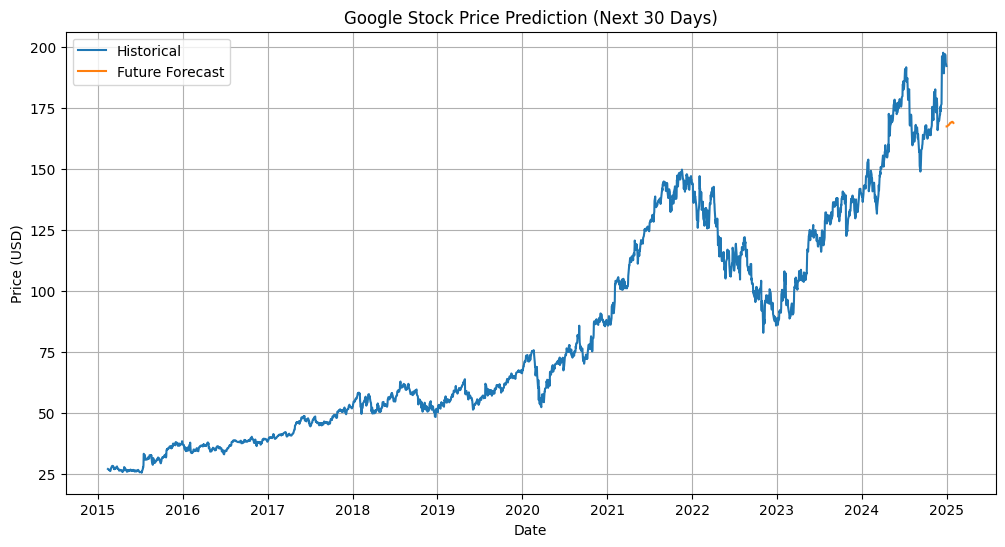

In [71]:
plt.figure(figsize=(12,6))

# Plot historical close prices
plt.plot(df.index, df['Close'], label="Historical")

# Plot 30-day future forecast
plt.plot(future_df['Date'], future_df['Predicted_Close'], label="Future Forecast")

plt.title("Google Stock Price Prediction (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [72]:
print(f"📌 Next-Day Prediction: ${next_day_price:.2f}")

📌 Next-Day Prediction: $141.40


In [73]:
# print("\n📌 Next 30 Days Predicted Prices:")
# print(future_df)

Evaluate Model

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE:", mape)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
RMSE: 0.07082736371853508
MAE : 0.055781718228307915
MAPE: 7.442604187303874


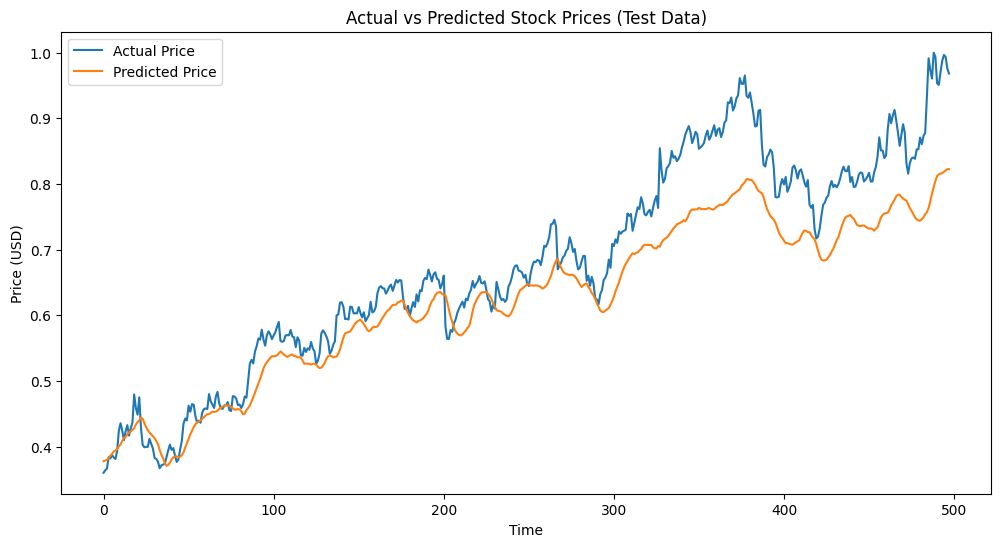

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.title("Actual vs Predicted Stock Prices (Test Data)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [76]:
print("📊 MODEL PERFORMANCE SUMMARY")
print("--------------------------------")
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape}%")


📊 MODEL PERFORMANCE SUMMARY
--------------------------------
RMSE : 0.07082736371853508
MAE  : 0.055781718228307915
MAPE : 7.442604187303874%


In [77]:
import joblib

# 1. Save the model in .keras format (NOT .h5)
model.save("bidirectional_lstm_GOOG.keras")
print("Model saved as bidirectional_lstm_GOOG.keras")

# 2. Save scaler as .pkl (NOT .save)
joblib.dump(scaler, "scaler_GOOG.pkl")
print("Scaler saved as scaler_GOOG.pkl")

# 3. Save training feature columns (important for prediction)
features = df.columns.tolist()
joblib.dump(features, "features_GOOG.pkl")
print("Features saved:", features)

Model saved as bidirectional_lstm_GOOG.keras
Scaler saved as scaler_GOOG.pkl
Features saved: [('Open', 'GOOG'), ('High', 'GOOG'), ('Low', 'GOOG'), ('Close', 'GOOG'), ('Volume', 'GOOG'), ('EMA_10', ''), ('EMA_20', ''), ('BB_MID', ''), ('BB_UPPER', ''), ('BB_LOWER', ''), ('RSI', ''), ('MACD', ''), ('MACD_Signal', ''), ('Lag_1', ''), ('Lag_7', ''), ('MA_7', ''), ('MA_30', '')]
